# WSL team xG analysis

For the 2020-2021 WSL season, how have teams performed relative to their xG?

In [4]:
from statsbombpy import sb
from utils.statsbomb_wrappers import Match, Season, ignore_warnings
import matplotlib.pyplot as plt
import pandas as pd

ignore_warnings()

In [3]:
wsl_comp_id = 37
wsl_matches_20_21 = Season(competition_id=wsl_comp_id, season_id=90)

In [17]:
def get_xg_and_goals_count(team, season):
    xg_and_goals_count = {}
    xg_and_goals_count["team"] = team
    matches = pd.concat(
        [season.get_matches(home_team=team), season.get_matches(away_team=team)]
    )
    all_shots = pd.concat(
        [
            Match(match_id=match_id).get_events(type="Shot")
            for match_id in matches["match_id"]
        ]
    )

    shots_for = all_shots.loc[all_shots["team"] == team]
    shots_against = all_shots.loc[all_shots["team"] != team]

    xg_and_goals_count["shots_for_xg"] = sum(shots_for["shot_statsbomb_xg"])
    xg_and_goals_count["goals_for_count"] = len(
        shots_for.loc[shots_for["shot_outcome"] == "Goal"]
    )

    xg_and_goals_count["shots_against_xg"] = sum(shots_against["shot_statsbomb_xg"])
    xg_and_goals_count["goals_against_count"] = len(
        shots_against.loc[shots_against["shot_outcome"] == "Goal"]
    )

    return xg_and_goals_count

In [21]:
teams = wsl_matches_20_21.matches["home_team"].unique()
season = wsl_matches_20_21
teams_xg_performance_list = [get_xg_and_goals_count(team, season) for team in teams]

In [65]:
teams_xg_performance = pd.DataFrame(teams_xg_performance_list)
standings = [
    "Chelsea FCW",
    "Manchester City WFC",
    "Arsenal WFC",
    "Manchester United",
    "Everton LFC",
    "Brighton & Hove Albion WFC",
    "Reading WFC",
    "Tottenham Hotspur Women",
    "West Ham United LFC",
    "Aston Villa",
    "Birmingham City WFC",
    "Bristol City WFC",
]
standings_df = pd.DataFrame(enumerate(standings), columns=["rank", "team"])
teams_xg_performance = teams_xg_performance.merge(
    standings_df, left_on="team", right_on="team"
)
teams_xg_performance = teams_xg_performance.set_index("rank")
teams_xg_performance = teams_xg_performance.sort_values("rank")

In [131]:
teams_xg_performance["xg_difference"] = (
    teams_xg_performance["shots_for_xg"] - teams_xg_performance["shots_against_xg"]
)
teams_xg_performance["goal_difference"] = (
    teams_xg_performance["goals_for_count"]
    - teams_xg_performance["goals_against_count"]
)
teams_xg_performance

,team,shots_for_xg,goals_for_count,shots_against_xg,goals_against_count,xg_difference,goal_difference
rank,,,,,,,
0,Chelsea FCW,58.853183,67,12.874724,9,45.978459,58
1,Manchester City WFC,57.845535,62,12.789424,13,45.056112,49
2,Arsenal WFC,53.897586,62,16.189281,14,37.708305,48
3,Manchester United,42.262806,43,19.597008,17,22.665799,26
4,Everton LFC,31.305604,39,31.822553,29,-0.516949,10
5,Brighton & Hove Albion WFC,20.848472,20,38.578553,41,-17.730081,-21
6,Reading WFC,28.059976,24,38.693543,41,-10.633567,-17
7,Tottenham Hotspur Women,20.403179,16,34.695895,39,-14.292716,-23
8,West Ham United LFC,23.352963,18,39.346642,37,-15.993679,-19


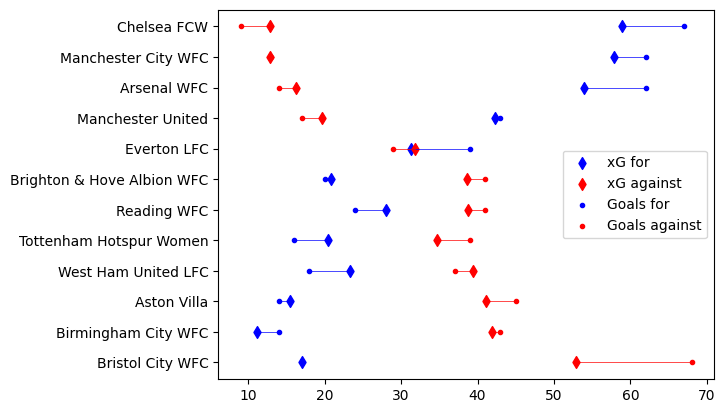

In [134]:
fig, ax = plt.subplots()
ax.scatter(
    teams_xg_performance["shots_for_xg"],
    teams_xg_performance["team"],
    marker="d",
    c="b",
)
ax.scatter(
    teams_xg_performance["shots_against_xg"],
    teams_xg_performance["team"],
    marker="d",
    c="r",
)
ax.scatter(
    teams_xg_performance["goals_for_count"],
    teams_xg_performance["team"],
    marker=".",
    c="b",
)
ax.scatter(
    teams_xg_performance["goals_against_count"],
    teams_xg_performance["team"],
    marker=".",
    c="r",
)

for index, row in teams_xg_performance.iterrows():
    ax.plot(
        [row.shots_for_xg, row.goals_for_count], [index, index], c="b", linewidth=0.5
    )
    ax.plot(
        [row.shots_against_xg, row.goals_against_count],
        [index, index],
        c="r",
        linewidth=0.5,
    )

ax.invert_yaxis()
ax.legend(["xG for", "xG against", "Goals for", "Goals against"])
plt.show()

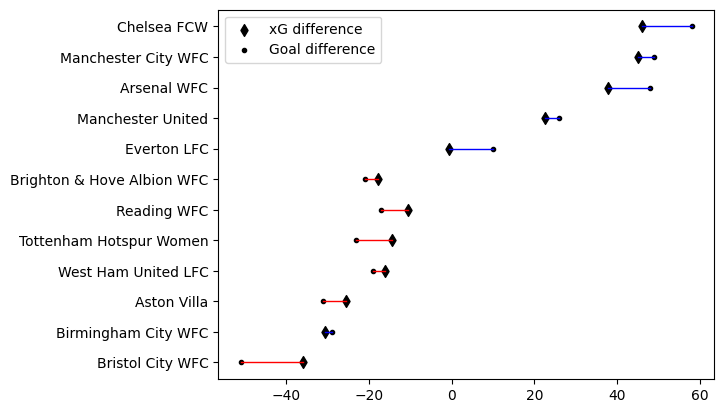

In [144]:
fig, ax = plt.subplots()

ax.scatter(
    teams_xg_performance["xg_difference"],
    teams_xg_performance["team"],
    marker="d",
    c="k",
)
ax.scatter(
    teams_xg_performance["goal_difference"],
    teams_xg_performance["team"],
    marker=".",
    c="k",
)

for index, row in teams_xg_performance.iterrows():
    if row.goal_difference > row.xg_difference:
        colour = "b"
    else:
        colour = "r"
    ax.plot(
        [row.xg_difference, row.goal_difference], [index, index], c=colour, linewidth=1
    )


ax.invert_yaxis()
ax.legend(["xG difference", "Goal difference"])